# 1. Load and Explore Dataset

Import the pandas, numpy and altair packages

In [1]:
# Solution
import pandas as pd
import numpy as np
import altair as alt

Mounting the drive
In this notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read data from CSV file.

In [3]:
data = pd.read_csv('/content/drive/My Drive/iLab/pd_speech_features.csv')

# 2. Data information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


# 3. Data cleaning

##Drop duplicated records
Found duplicated data 1702 records

In [5]:
# Check for duplicated values and display the count
duplicate_count = data.duplicated().sum()

# Print the number of duplicated values
print("Number of duplicated values in Data set:", duplicate_count)

Number of duplicated values in Data set: 1


In [6]:
num_records = data.shape[0]
print(f"Number of Records before drop duplicated : {num_records}")

data = data.drop_duplicates()
num_records = data.shape[0]
print(f"Number of Records after drop duplicated : {num_records}")

Number of Records before drop duplicated : 756
Number of Records after drop duplicated : 755


###Check Null value in columns
Found Null value in columns

In [7]:
# Check for null values in all columns
null_columns = data.columns[data.isnull().any()]
null_count = data[null_columns].isnull().sum()

if null_count.empty:
    print("No null values found in any column.")
else:
    print("Columns with null values in data set:")
    print(null_count)

No null values found in any column.


# 4. Feature Reduction

##(1) Principal Component Analysis (PCA)

Explained Variance Ratio per Component:
 [1.29900360e-01 9.38619710e-02 8.24350769e-02 4.26157380e-02
 3.57413011e-02 2.99853354e-02 2.49548171e-02 2.21294159e-02
 2.03351946e-02 1.82202474e-02 1.76571974e-02 1.49431165e-02
 1.30678546e-02 1.27307495e-02 1.25853100e-02 1.16724027e-02
 1.06874517e-02 1.05811214e-02 9.47791069e-03 9.34607012e-03
 8.68203678e-03 8.07711984e-03 7.62536095e-03 7.38467237e-03
 6.69010572e-03 6.27653200e-03 6.23592628e-03 6.12445368e-03
 5.79271272e-03 5.60446759e-03 5.24639646e-03 5.14582474e-03
 4.98475068e-03 4.82301953e-03 4.66582444e-03 4.56296980e-03
 4.41300235e-03 4.16324898e-03 3.97979643e-03 3.79291380e-03
 3.77373898e-03 3.69459516e-03 3.62724504e-03 3.50839167e-03
 3.45103908e-03 3.40735249e-03 3.32342939e-03 3.13867278e-03
 3.12267685e-03 3.06694207e-03 2.96801347e-03 2.95509858e-03
 2.91934415e-03 2.83270968e-03 2.78037798e-03 2.76328736e-03
 2.68165724e-03 2.65056019e-03 2.59194013e-03 2.56364824e-03
 2.49610266e-03 2.47567970e-03 2.44523545e-0

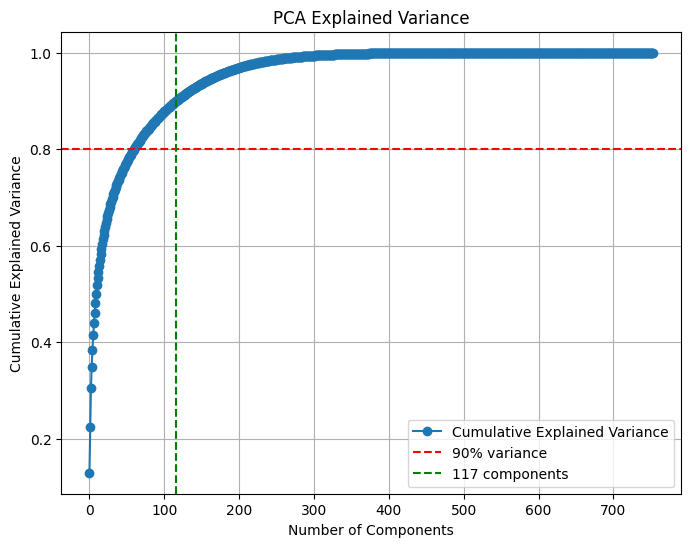

Cumulative Variance: [0.12990036 0.22376233 0.30619741 0.34881315 0.38455445 0.41453978
 0.4394946  0.46162402 0.48195921 0.50017946 0.51783666 0.53277977
 0.54584763 0.55857838 0.57116369 0.58283609 0.59352354 0.60410466
 0.61358257 0.62292864 0.63161068 0.6396878  0.64731316 0.65469783
 0.66138794 0.66766447 0.6739004  0.68002485 0.68581756 0.69142203
 0.69666843 0.70181425 0.706799   0.71162202 0.71628785 0.72085082
 0.72526382 0.72942707 0.73340686 0.73719978 0.74097352 0.74466811
 0.74829536 0.75180375 0.75525479 0.75866214 0.76198557 0.76512424
 0.76824692 0.77131386 0.77428187 0.77723697 0.78015632 0.78298903
 0.7857694  0.78853269 0.79121435 0.79386491 0.79645685 0.7990205
 0.8015166  0.80399228 0.80643752 0.80882219 0.81115603 0.81348185
 0.81575399 0.81798986 0.82021726 0.82243118 0.82463112 0.82676454
 0.82886356 0.83095666 0.83300916 0.83503438 0.83700197 0.83893782
 0.84086264 0.84277104 0.84466253 0.84652146 0.84835713 0.85018003
 0.8519974  0.8537964  0.85556036 0.857305

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = data.drop(['id'], axis=1)
y = data['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio per Component:\n", pca.explained_variance_ratio_)

# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components that explain at least 90% of the total variance
n_components = np.where(cumulative_var_ratio >= 0.90)[0][0] + 1

# Select the first n_components principal components from the transformed data
X_pca_selected = X_pca[:, :n_components]

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_var_ratio, marker='o', label="Cumulative Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--', label='90% variance')  # Adjust this line to 90% if needed
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative variance
print("Cumulative Variance:", cumulative_var_ratio)
print('Number of Components (90% variance) = ', n_components)
print('Original Data Shape = ', data.shape)


**Number of Components (90% variance) = 117**: This means that, after performing PCA, you need 117 principal components to explain at least 90% of the variance in the original data.

**Original Data Shape = (755, 755)**: This means your original dataset has 755 samples (rows) and 755 features (columns).


**Interpretation:**

PCA reduces the dimensionality of the data by transforming the original features into new "principal components," which are linear combinations of the original features. These components are ordered by the amount of variance they explain, with the first few components capturing most of the variance in the data.

**What to do next:**

1.   **Dimensionality Reduction:** Use the first 117 principal components as input for your machine learning models instead of all 755 features. These components will encapsulate most of the information from the original features.
2.   **Trade-off:** By reducing the number of components, you may slightly lose some variance (i.e., information), but in exchange, you gain a more efficient model.

**If 117 components seem like a lot**, you can choose a **lower threshold of explained variance, such as 80% or 85%,** depending on the specific trade-off you're willing to make between complexity and variance retention.

##(1.1) PCA: Find Top 10 Contributing Features for each component:

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=117)  # Set number of components to 117 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(117)])

# Find the top contributing features for each principal component
top_contributing_features = {}

# For each principal component, find the top features based on absolute loadings
for i in range(117):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10)  # Get top 10 features for each component
    top_contributing_features[component] = top_features.index.tolist()

# Display the top contributing features for each component
for pc, features in top_contributing_features.items():
    print(f"Top features contributing to {pc}: {features}")


Top features contributing to PC1: ['app_LT_entropy_shannon_6_coef', 'app_LT_entropy_shannon_5_coef', 'app_LT_TKEO_mean_10_coef', 'app_LT_TKEO_std_10_coef', 'app_LT_entropy_shannon_7_coef', 'app_LT_TKEO_std_9_coef', 'app_LT_TKEO_mean_9_coef', 'app_LT_TKEO_mean_8_coef', 'app_LT_entropy_shannon_10_coef', 'app_LT_entropy_shannon_8_coef']
Top features contributing to PC2: ['tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_25', 'tqwt_maxValue_dec_19', 'tqwt_minValue_dec_19', 'tqwt_maxValue_dec_8', 'app_TKEO_std_4_coef', 'tqwt_minValue_dec_8', 'app_det_TKEO_mean_3_coef', 'minIntensity', 'tqwt_minValue_dec_9']
Top features contributing to PC3: ['det_LT_TKEO_std_3_coef', 'det_LT_TKEO_std_2_coef', 'det_LT_TKEO_mean_2_coef', 'Ed_6_coef', 'det_TKEO_std_3_coef', 'Ed2_2_coef', 'Ea', 'det_TKEO_mean_6_coef', 'det_LT_TKEO_std_4_coef', 'Ed2_3_coef']
Top features contributing to PC4: ['tqwt_entropy_log_dec_36', 'tqwt_TKEO_std_dec_2', 'tqwt_TKEO_mean_dec_8', 'tqwt_maxValue_dec_31', 'tqwt_entropy_shannon_de

**Identify the most important features contributing to the first 117 principal components:**


1.   **PCA Loadings (Components Weights):** PCA generates "loadings" that show how much each original feature contributes to each principal component. These loadings are coefficients that map original features to the new principal components.
2.   **Identify the Top Features Based on Loadings:** For each of the 117 principal components, you can rank the original features by their absolute loading values. Features with higher absolute values of loadings contribute more to the component.

##(1.2) PCA Find Unique Features Across All Principal Components:

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=117)  # Set number of components to 117 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(117)])

# Find the top contributing features for each principal component
distinct_features = set()  # Use a set to keep track of distinct features

# For each principal component, find the top features based on absolute loadings
for i in range(117):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10).index.tolist()  # Get top 10 features for each component
    distinct_features.update(top_features)  # Add features to the set

# Convert the set of distinct features to a list for easier manipulation
pca_distinct_features = list(distinct_features)

# Print distinct features
print(f"Total number of distinct features: {len(pca_distinct_features)}")
print("Distinct features contributing to the PCs:")
for feature in pca_distinct_features:
    print(feature)


Total number of distinct features: 390
Distinct features contributing to the PCs:
std_MFCC_5th_coef
mean_4th_delta_delta
tqwt_meanValue_dec_16
tqwt_medianValue_dec_5
GQ_std_cycle_closed
tqwt_skewnessValue_dec_2
Ed2_3_coef
tqwt_meanValue_dec_19
tqwt_TKEO_mean_dec_29
tqwt_meanValue_dec_20
app_LT_TKEO_mean_10_coef
b1
tqwt_meanValue_dec_6
tqwt_kurtosisValue_dec_13
mean_5th_delta
Ed2_6_coef
det_TKEO_mean_6_coef
tqwt_meanValue_dec_9
mean_MFCC_12th_coef
tqwt_skewnessValue_dec_25
std_delta_log_energy
tqwt_entropy_shannon_dec_4
app_det_TKEO_mean_3_coef
tqwt_stdValue_dec_34
det_LT_entropy_shannon_7_coef
tqwt_energy_dec_8
stdDevPeriodPulses
tqwt_minValue_dec_8
det_entropy_shannon_7_coef
tqwt_kurtosisValue_dec_16
tqwt_TKEO_std_dec_34
b3
mean_6th_delta
mean_MFCC_10th_coef
tqwt_kurtosisValue_dec_12
tqwt_stdValue_dec_27
tqwt_medianValue_dec_25
GNE_SNR_SEO
mean_1st_delta
GNE_std
tqwt_maxValue_dec_27
tqwt_entropy_shannon_dec_30
tqwt_entropy_shannon_dec_32
tqwt_kurtosisValue_dec_33
GNE_NSR_TKEO
tqwt_TKE

**Total number of distinct features from 117 components: 389**

To identify distinct features contributing to each principal component (PC).


1.   Get distinct features across all principal components.
2.   Avoid duplication: Ensure features contributing to multiple PCs are only listed once.





##(1.3) PCA Same as 1. but show more information

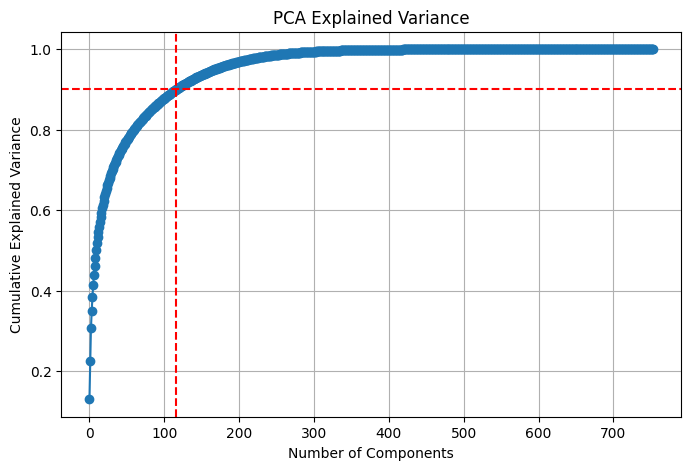

Number of components explaining at least 90% variance: 117
Component 1: Explained Variance Ratio = 0.1299, Cumulative Variance = 0.1299
Component 2: Explained Variance Ratio = 0.0939, Cumulative Variance = 0.2238
Component 3: Explained Variance Ratio = 0.0824, Cumulative Variance = 0.3062
Component 4: Explained Variance Ratio = 0.0426, Cumulative Variance = 0.3488
Component 5: Explained Variance Ratio = 0.0357, Cumulative Variance = 0.3846
Component 6: Explained Variance Ratio = 0.0300, Cumulative Variance = 0.4145
Component 7: Explained Variance Ratio = 0.0250, Cumulative Variance = 0.4395
Component 8: Explained Variance Ratio = 0.0221, Cumulative Variance = 0.4616
Component 9: Explained Variance Ratio = 0.0203, Cumulative Variance = 0.4820
Component 10: Explained Variance Ratio = 0.0182, Cumulative Variance = 0.5002
Component 11: Explained Variance Ratio = 0.0177, Cumulative Variance = 0.5178
Component 12: Explained Variance Ratio = 0.0149, Cumulative Variance = 0.5328
Component 13: 

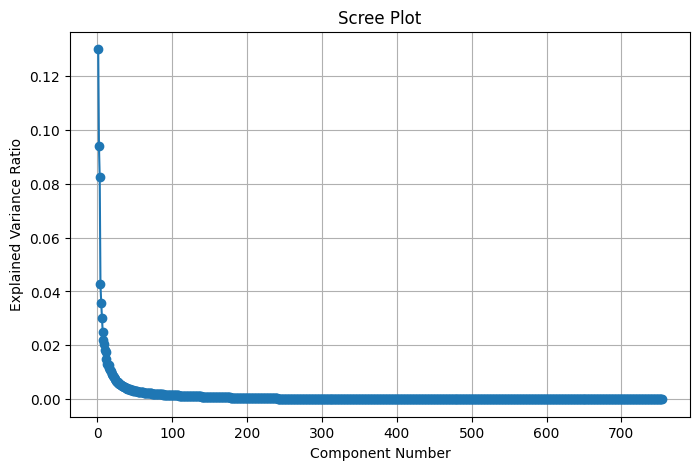

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Selecting only numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Drop the 'id' column
if 'id' in numerical_features.columns:
    numerical_features = numerical_features.drop('id', axis=1)


# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Initialize PCA with all components to understand variance
pca = PCA()  # Not setting n_components initially to capture all components

# Fit PCA on the scaled data
principal_components = pca.fit_transform(data_scaled)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.axvline(x=np.argmax(explained_variance >= 0.90), color='r', linestyle='--')  # Line at the component that crosses 90%
plt.grid(True)
plt.show()

# Print the number of components that explain at least 90% of the variance
n_components_90 = np.argmax(explained_variance >= 0.90) + 1  # +1 because index starts at 0
print(f"Number of components explaining at least 90% variance: {n_components_90}")

# Print explained variance ratios and cumulative sum
explained_variance_ratios = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratios)

# Display explained variance ratios for each component
for i, (ratio, cumsum) in enumerate(zip(explained_variance_ratios, explained_variance_cumsum)):
    print(f"Component {i+1}: Explained Variance Ratio = {ratio:.4f}, Cumulative Variance = {cumsum:.4f}")

# Cross-check the 90% variance cutoff point
n_components_90 = np.argmax(explained_variance_cumsum >= 0.90) + 1
print(f"Number of components explaining at least 90% variance: {n_components_90}")

# Scree plot to visualize explained variance per component
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()



##(2) Sensitivity Analysis - Random Forest Classifier - Rank All Features

Accuracy of the model: 0.8634361233480177
Feature ranking:
1. feature std_delta_delta_log_energy (0.017828152546628052)
2. feature std_delta_log_energy (0.014470575417656378)
3. feature std_7th_delta_delta (0.011752045568207132)
4. feature std_7th_delta (0.011437929030978797)
5. feature std_9th_delta_delta (0.010399219806753523)
6. feature std_6th_delta_delta (0.009886764751837779)
7. feature std_6th_delta (0.009729764910019428)
8. feature tqwt_TKEO_std_dec_12 (0.00912134486146735)
9. feature tqwt_maxValue_dec_12 (0.008070308132787921)
10. feature std_8th_delta_delta (0.008016493676408987)
11. feature tqwt_energy_dec_12 (0.007352837288879878)
12. feature tqwt_kurtosisValue_dec_36 (0.006817330209448279)
13. feature tqwt_minValue_dec_11 (0.006530406954073403)
14. feature tqwt_energy_dec_11 (0.006485508675553803)
15. feature tqwt_stdValue_dec_11 (0.006370336160070926)
16. feature tqwt_entropy_log_dec_35 (0.0059862890918998025)
17. feature std_8th_delta (0.005949488778181585)
18. feature t

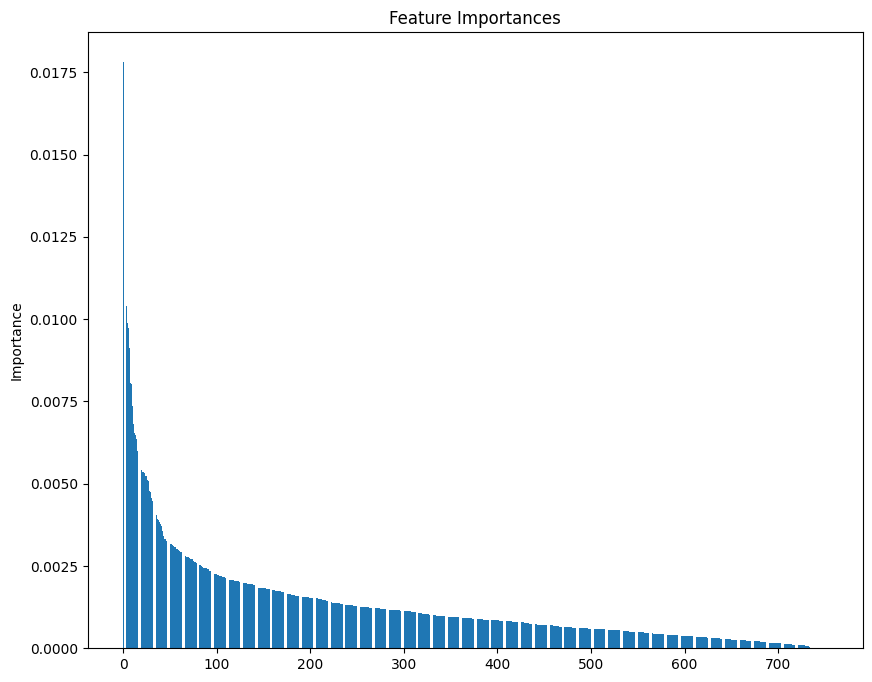

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Select features and target variable
X = data.drop(['class','id'], axis=1)
y = data['class']  # Update accordingly

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

# Get feature importances
rf_feature_importances = rf.feature_importances_
indices = np.argsort(rf_feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({rf_feature_importances[indices[f]]})")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), rf_feature_importances[indices], align='center')
# Remove feature name labels by commenting out or removing plt.xticks()
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel('Importance')
plt.show()

Perform a **Sensitivity Analysis using the Random Forest classifier** to assess the importance of each feature in your dataset. This method will help you understand which features have the most impact on the model's predictions:

**Accuracy of the model: 0.8634361233480177**

*   Feature Importance: This analysis will show which features contribute most to the model's predictions, helping prioritize which features affect outcomes the most.
*   Visualization: The plot at the end will help visually assess the importance of each feature.

In [24]:
from sklearn.linear_model import LassoCV

# Fit Lasso model with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train.columns[(lasso.coef_ != 0)]
print("Selected features using Lasso Regression:", selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e-03, tolerance: 8.036e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e-02, tolerance: 8.036e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e-02, tolerance: 8.036e

Selected features using Lasso Regression: Index(['DFA', 'locPctJitter', 'b4', 'GNE_SNR_TKEO', 'GNE_NSR_TKEO',
       'IMF_SNR_SEO', 'IMF_SNR_entropy', 'IMF_NSR_TKEO', 'mean_MFCC_1st_coef',
       'mean_MFCC_2nd_coef', 'mean_MFCC_8th_coef', 'mean_2nd_delta',
       'mean_10th_delta_delta', 'std_MFCC_2nd_coef', 'std_8th_delta',
       'std_9th_delta', 'std_10th_delta', 'std_delta_delta_log_energy',
       'std_6th_delta_delta', 'std_7th_delta_delta', 'std_9th_delta_delta',
       'det_entropy_log_3_coef', 'tqwt_energy_dec_6', 'tqwt_energy_dec_7',
       'tqwt_energy_dec_11', 'tqwt_energy_dec_12', 'tqwt_energy_dec_19',
       'tqwt_energy_dec_24', 'tqwt_energy_dec_25',
       'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_log_dec_25',
       'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_33',
       'tqwt_TKEO_mean_dec_21', 'tqwt_TKEO_std_dec_6',
       'tqwt_medianValue_dec_1', 'tqwt_medianValue_dec_5',
       'tqwt_medianValue_dec_9', 'tqwt_medianValue_dec_10',
       'tqwt_medianValue_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e-01, tolerance: 8.091e-03
  model = cd_fast.enet_coordinate_descent(


##(2.1) Sensitivity Analysis - Random Forest Classifier - 389 Features

Accuracy of the model: 0.8634361233480177
Top 389 features:
1. feature std_delta_delta_log_energy (0.017828152546628052)
2. feature std_delta_log_energy (0.014470575417656378)
3. feature std_7th_delta_delta (0.011752045568207132)
4. feature std_7th_delta (0.011437929030978797)
5. feature std_9th_delta_delta (0.010399219806753523)
6. feature std_6th_delta_delta (0.009886764751837779)
7. feature std_6th_delta (0.009729764910019428)
8. feature tqwt_TKEO_std_dec_12 (0.00912134486146735)
9. feature tqwt_maxValue_dec_12 (0.008070308132787921)
10. feature std_8th_delta_delta (0.008016493676408987)
11. feature tqwt_energy_dec_12 (0.007352837288879878)
12. feature tqwt_kurtosisValue_dec_36 (0.006817330209448279)
13. feature tqwt_minValue_dec_11 (0.006530406954073403)
14. feature tqwt_energy_dec_11 (0.006485508675553803)
15. feature tqwt_stdValue_dec_11 (0.006370336160070926)
16. feature tqwt_entropy_log_dec_35 (0.0059862890918998025)
17. feature std_8th_delta (0.005949488778181585)
18. feature 

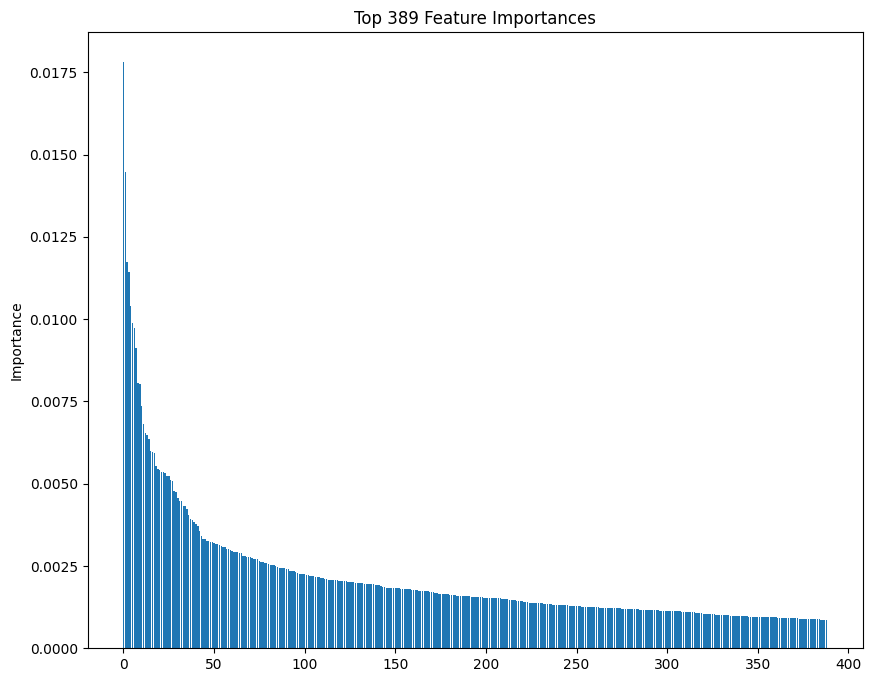

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']  # Update accordingly

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select the top 389 features
top_n = 389
top_features_indices = indices[:top_n]
rf_top_features = X_train.columns[top_features_indices]

# Print the ranking of the top features
print(f"Top {top_n} features:")
for f in range(top_n):
    print(f"{f + 1}. feature {rf_top_features[f]} ({importances[top_features_indices[f]]})")

# Plot feature importances for top features
plt.figure(figsize=(10, 8))
plt.title(f'Top {top_n} Feature Importances')
plt.bar(range(top_n), importances[top_features_indices], align='center')
#plt.xticks(range(top_n), rf_top_features, rotation=90)
plt.ylabel('Importance')
plt.show()


##(3) Sensitivity Analysis - Lasso Regression (L1 Regularization)

In [14]:
from sklearn.linear_model import LassoCV

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit Lasso model with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get selected features
lasso_selected_features = X_train.columns[(lasso.coef_ != 0)]
print("Selected features using Lasso Regression:", lasso_selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e-03, tolerance: 8.036e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e-02, tolerance: 8.036e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e-02, tolerance: 8.036e

Selected features using Lasso Regression: Index(['DFA', 'locPctJitter', 'b4', 'GNE_SNR_TKEO', 'GNE_NSR_TKEO',
       'IMF_SNR_SEO', 'IMF_SNR_entropy', 'IMF_NSR_TKEO', 'mean_MFCC_1st_coef',
       'mean_MFCC_2nd_coef', 'mean_MFCC_8th_coef', 'mean_2nd_delta',
       'mean_10th_delta_delta', 'std_MFCC_2nd_coef', 'std_8th_delta',
       'std_9th_delta', 'std_10th_delta', 'std_delta_delta_log_energy',
       'std_6th_delta_delta', 'std_7th_delta_delta', 'std_9th_delta_delta',
       'det_entropy_log_3_coef', 'tqwt_energy_dec_6', 'tqwt_energy_dec_7',
       'tqwt_energy_dec_11', 'tqwt_energy_dec_12', 'tqwt_energy_dec_19',
       'tqwt_energy_dec_24', 'tqwt_energy_dec_25',
       'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_log_dec_25',
       'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_33',
       'tqwt_TKEO_mean_dec_21', 'tqwt_TKEO_std_dec_6',
       'tqwt_medianValue_dec_1', 'tqwt_medianValue_dec_5',
       'tqwt_medianValue_dec_9', 'tqwt_medianValue_dec_10',
       'tqwt_medianValue_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e-01, tolerance: 8.091e-03
  model = cd_fast.enet_coordinate_descent(


##(4) Sensitivity Analysis - Tree-Based Models (Gradient Boosting)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
gb_importances = gb_model.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1]
gb_top_features = X_train.columns[gb_indices[:389]]
print("Top features from Gradient Boosting:", gb_top_features)


Top features from Gradient Boosting: Index(['std_7th_delta_delta', 'std_delta_delta_log_energy',
       'tqwt_TKEO_std_dec_12', 'std_delta_log_energy',
       'tqwt_entropy_log_dec_27', 'tqwt_entropy_log_dec_33',
       'mean_MFCC_2nd_coef', 'std_MFCC_2nd_coef', 'tqwt_entropy_log_dec_12',
       'std_6th_delta',
       ...
       'tqwt_kurtosisValue_dec_2', 'tqwt_skewnessValue_dec_36',
       'tqwt_skewnessValue_dec_34', 'tqwt_skewnessValue_dec_33',
       'tqwt_skewnessValue_dec_32', 'tqwt_skewnessValue_dec_31', 'GNE_NSR_SEO',
       'VFER_mean', 'VFER_entropy', 'tqwt_skewnessValue_dec_29'],
      dtype='object', length=389)


##(5) Sensitivity Analysis - Mutual Information

In [17]:
from sklearn.feature_selection import mutual_info_classif

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_indices = np.argsort(mi_scores)[::-1]
mi_top_features = X_train.columns[mi_indices[:389]]
print("Top features based on Mutual Information:", mi_top_features)


Top features based on Mutual Information: Index(['minIntensity', 'std_8th_delta_delta', 'tqwt_entropy_log_dec_35',
       'mean_MFCC_2nd_coef', 'tqwt_TKEO_std_dec_14', 'std_Log_energy',
       'tqwt_minValue_dec_10', 'std_7th_delta_delta', 'maxIntensity',
       'tqwt_maxValue_dec_11',
       ...
       'tqwt_medianValue_dec_2', 'tqwt_entropy_log_dec_4',
       'mean_6th_delta_delta', 'tqwt_minValue_dec_32', 'tqwt_minValue_dec_27',
       'det_LT_TKEO_std_7_coef', 'tqwt_medianValue_dec_7',
       'det_LT_TKEO_mean_5_coef', 'tqwt_medianValue_dec_4', 'IMF_NSR_TKEO'],
      dtype='object', length=389)


##(6) Sensitivity Analysis - Recursive Feature Elimination (RFE) - Run 7 minutes

In [18]:
from sklearn.feature_selection import RFE

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Use Random Forest as the base model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=389)
X_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Get selected features
rfe_selected_features = X_train.columns[rfe.support_]
print("Selected features using RFE:", rfe_selected_features)


Selected features using RFE: Index(['PPE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses',
       'locPctJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'apq11Shimmer',
       'meanHarmToNoiseHarmonicity',
       ...
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=389)


#5. Feature reduction comparison (6 Algorithms with 389 features)

Accuracy of the model using PCA features: 0.8546255506607929
Classification Report (PCA Features):
               precision    recall  f1-score   support

           0       0.86      0.53      0.66        60
           1       0.85      0.97      0.91       167

    accuracy                           0.85       227
   macro avg       0.86      0.75      0.78       227
weighted avg       0.86      0.85      0.84       227

Accuracy of the model using RF-selected features: 0.8810572687224669
Classification Report (Random Forest Features):
               precision    recall  f1-score   support

           0       0.97      0.57      0.72        60
           1       0.86      0.99      0.92       167

    accuracy                           0.88       227
   macro avg       0.92      0.78      0.82       227
weighted avg       0.89      0.88      0.87       227

Accuracy of the model using Lasso-selected features: 0.8678414096916299
Classification Report (Lasso Regression Features):
     

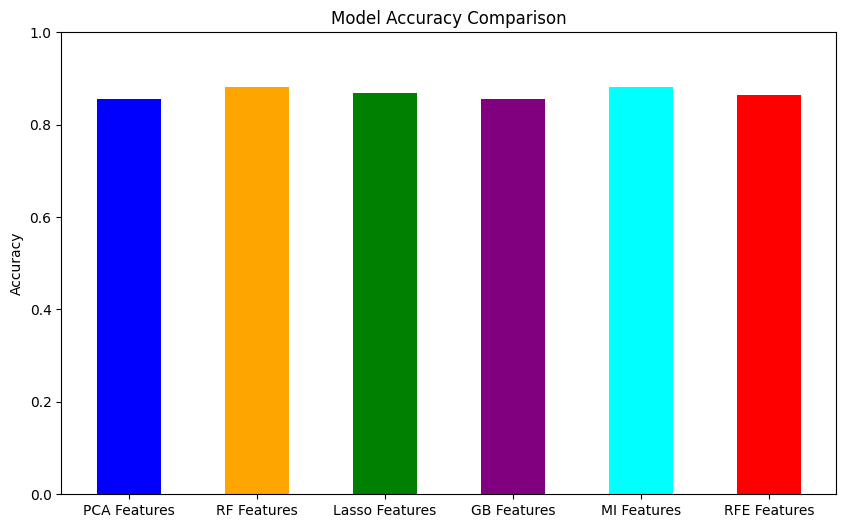

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming you have two sets of features
pca_features = data[pca_distinct_features]
rf_features = data[rf_top_features]
lasso_features = data[lasso_selected_features]
gb_features = data[gb_top_features]
mi_features = data[mi_top_features]
rfe_features = data[rfe_selected_features]
y = data['class']    # Target variable

# Function to train and evaluate a model
def evaluate_model(X):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_scaled)

    # Calculate accuracy and print the classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

# Evaluate PCA features
accuracy_pca, report_pca = evaluate_model(pca_features)
print(f"Accuracy of the model using PCA features: {accuracy_pca}")
print("Classification Report (PCA Features):\n", report_pca)

# Evaluate other features
accuracy_rf, report_rf = evaluate_model(rf_features)
print(f"Accuracy of the model using RF-selected features: {accuracy_rf}")
print("Classification Report (Random Forest Features):\n", report_rf)

# Evaluate Lasso features
accuracy_lasso, report_lasso = evaluate_model(lasso_features)
print(f"Accuracy of the model using Lasso-selected features: {accuracy_lasso}")
print("Classification Report (Lasso Regression Features):\n", report_lasso)

# Evaluate Lasso features
accuracy_gb, report_gb = evaluate_model(gb_features)
print(f"Accuracy of the model using GB-selected features: {accuracy_gb}")
print("Classification Report (Gradient Boosting Features):\n", report_gb)

# Evaluate Lasso features
accuracy_mi, report_mi = evaluate_model(mi_features)
print(f"Accuracy of the model using MI-selected features: {accuracy_mi}")
print("Classification Report (Mutual Information Features):\n", report_mi)

# Evaluate Lasso features
accuracy_rfe, report_rfe = evaluate_model(rfe_features)
print(f"Accuracy of the model using RFE-selected features: {accuracy_rfe}")
print("Classification Report (Recursive Feature Elimination Features):\n", report_rfe)

# Optional: Compare the accuracies visually
plt.figure(figsize=(10, 6))  # Increase figure size if necessary

# List of feature sets and their accuracies
feature_sets = ['PCA Features', 'RF Features', 'Lasso Features', 'GB Features', 'MI Features', 'RFE Features']
accuracies = [accuracy_pca, accuracy_rf, accuracy_lasso, accuracy_gb, accuracy_mi, accuracy_rfe]

# Define a color palette
colors = ['blue', 'orange', 'green', 'purple', 'cyan', 'red']

# Create the bar chart with reduced bar width
plt.bar(feature_sets, accuracies, color=colors, width=0.5)  # Adjust the width as needed
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


#6. Comparison Accuracy value for testing every feature in rank

##(1) Ranking by Random Forest Classifier

Accuracy with top 1 features: 0.6916
Accuracy with top 2 features: 0.7709
Accuracy with top 3 features: 0.7885
Accuracy with top 4 features: 0.7621
Accuracy with top 5 features: 0.7841
Accuracy with top 6 features: 0.7709
Accuracy with top 7 features: 0.7621
Accuracy with top 8 features: 0.8018
Accuracy with top 9 features: 0.8150
Accuracy with top 10 features: 0.8370
Accuracy with top 11 features: 0.8194
Accuracy with top 12 features: 0.8502
Accuracy with top 13 features: 0.8458
Accuracy with top 14 features: 0.8414
Accuracy with top 15 features: 0.8502
Accuracy with top 16 features: 0.8678
Accuracy with top 17 features: 0.8458
Accuracy with top 18 features: 0.8590
Accuracy with top 19 features: 0.8546
Accuracy with top 20 features: 0.8722
Accuracy with top 21 features: 0.8502
Accuracy with top 22 features: 0.8634
Accuracy with top 23 features: 0.8590
Accuracy with top 24 features: 0.8678
Accuracy with top 25 features: 0.8722
Accuracy with top 26 features: 0.8590
Accuracy with top 27 

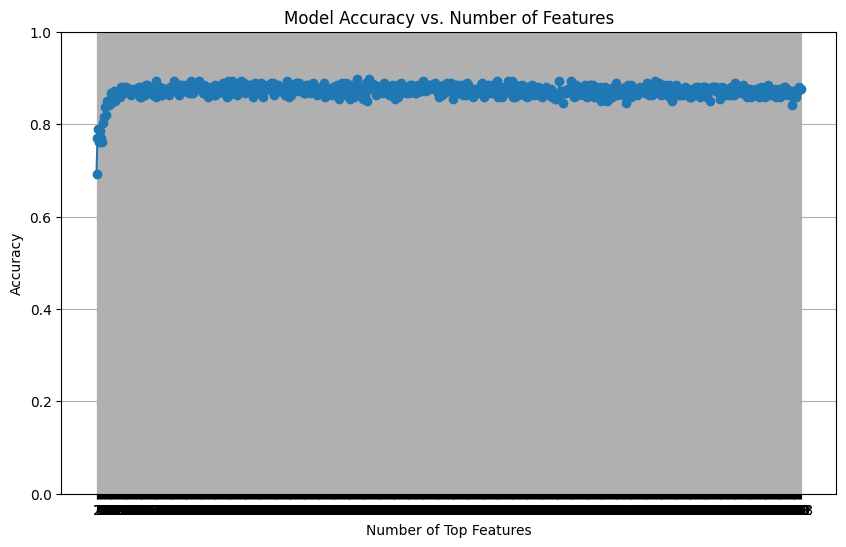

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Function to evaluate accuracy with top n features
def evaluate_accuracy_with_top_features(X, y, n):
    # Select top n features
    feature_importances = rf_feature_importances
    indices = np.argsort(feature_importances)[::-1]

    # Get the top n feature names
    top_features = X.columns[indices[:n]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.3, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Main script
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Initialize Random Forest model to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Check accuracy for different numbers of top features
accuracies = []
max_features = 753  # Set a maximum number of features to check

for n in range(1, max_features + 1):
    accuracy = evaluate_accuracy_with_top_features(X, y, n)
    accuracies.append((n, accuracy))
    print(f"Accuracy with top {n} features: {accuracy:.4f}")

# Optional: Plot accuracies
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.title('Model Accuracy vs. Number of Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(feature_counts)
plt.ylim(0, 1)
plt.grid()
plt.show()


##(2) Ranking by Mutual Info Classifier

Accuracy with top 1 features based on MI: 0.5991
Accuracy with top 2 features based on MI: 0.7269
Accuracy with top 3 features based on MI: 0.7401
Accuracy with top 4 features based on MI: 0.8282
Accuracy with top 5 features based on MI: 0.8546
Accuracy with top 6 features based on MI: 0.8502
Accuracy with top 7 features based on MI: 0.8458
Accuracy with top 8 features based on MI: 0.8370
Accuracy with top 9 features based on MI: 0.8326
Accuracy with top 10 features based on MI: 0.8282
Accuracy with top 11 features based on MI: 0.8326
Accuracy with top 12 features based on MI: 0.8150
Accuracy with top 13 features based on MI: 0.8326
Accuracy with top 14 features based on MI: 0.8414
Accuracy with top 15 features based on MI: 0.8282
Accuracy with top 16 features based on MI: 0.8634
Accuracy with top 17 features based on MI: 0.8678
Accuracy with top 18 features based on MI: 0.8502
Accuracy with top 19 features based on MI: 0.8546
Accuracy with top 20 features based on MI: 0.8458
Accuracy 

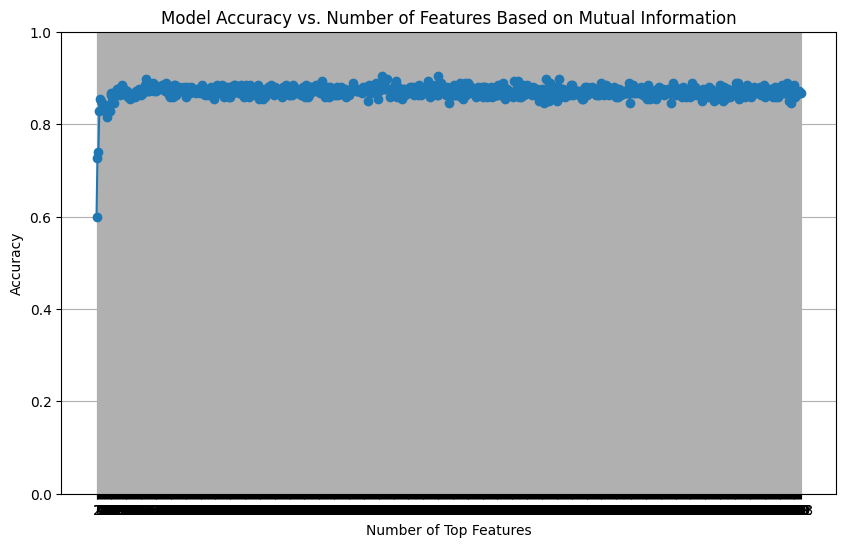

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_indices = np.argsort(mi_scores)[::-1]

# Initialize a list to store accuracies
accuracies = []

# Check accuracy for different numbers of top features based on MI
max_features = 753  # Set a maximum number of features to check

for n in range(1, max_features + 1):
    # Select top n features based on MI
    top_mi_features = X_train.columns[mi_indices[:n]]

    # Train the Random Forest model with top features
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled[:, mi_indices[:n]], y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_scaled[:, mi_indices[:n]])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f"Accuracy with top {n} features based on MI: {accuracy:.4f}")

# Optional: Plot accuracies
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.title('Model Accuracy vs. Number of Features Based on Mutual Information')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(feature_counts)
plt.ylim(0, 1)
plt.grid()
plt.show()


##(3) Ranking by Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e-03, tolerance: 8.036e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e-02, tolerance: 8.036e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e-02, tolerance: 8.036e

Selected features using Lasso Regression: Index(['DFA', 'locPctJitter', 'b4', 'GNE_SNR_TKEO', 'GNE_NSR_TKEO',
       'IMF_SNR_SEO', 'IMF_SNR_entropy', 'IMF_NSR_TKEO', 'mean_MFCC_1st_coef',
       'mean_MFCC_2nd_coef', 'mean_MFCC_8th_coef', 'mean_2nd_delta',
       'mean_10th_delta_delta', 'std_MFCC_2nd_coef', 'std_8th_delta',
       'std_9th_delta', 'std_10th_delta', 'std_delta_delta_log_energy',
       'std_6th_delta_delta', 'std_7th_delta_delta', 'std_9th_delta_delta',
       'det_entropy_log_3_coef', 'tqwt_energy_dec_6', 'tqwt_energy_dec_7',
       'tqwt_energy_dec_11', 'tqwt_energy_dec_12', 'tqwt_energy_dec_19',
       'tqwt_energy_dec_24', 'tqwt_energy_dec_25',
       'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_log_dec_25',
       'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_33',
       'tqwt_TKEO_mean_dec_21', 'tqwt_TKEO_std_dec_6',
       'tqwt_medianValue_dec_1', 'tqwt_medianValue_dec_5',
       'tqwt_medianValue_dec_9', 'tqwt_medianValue_dec_10',
       'tqwt_medianValue_

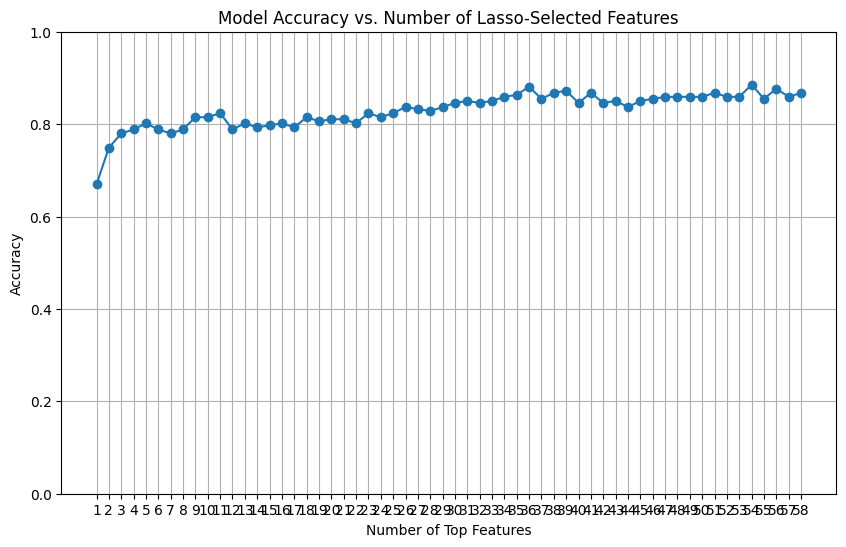

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso model with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get selected features
lasso_selected_features = X_train.columns[(lasso.coef_ != 0)]
print("Selected features using Lasso Regression:", lasso_selected_features)

# Evaluate accuracy for different numbers of top Lasso-selected features
accuracies = []
max_features = len(lasso_selected_features)  # Total number of selected features

for n in range(1, max_features + 1):
    # Select top n features
    top_lasso_features = lasso_selected_features[:n]

    # Train a Random Forest model with top features
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled[:, X_train.columns.isin(top_lasso_features)], y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_scaled[:, X_test.columns.isin(top_lasso_features)])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f"Accuracy with top {n} Lasso features: {accuracy:.4f}")

# Optional: Plot accuracies
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.title('Model Accuracy vs. Number of Lasso-Selected Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(feature_counts)
plt.ylim(0, 1)
plt.grid()
plt.show()


##(4) Ranking by Gradient Boosting Classifier

Accuracy with top 1 GB features: 0.6608
Accuracy with top 2 GB features: 0.7401
Accuracy with top 3 GB features: 0.7930
Accuracy with top 4 GB features: 0.8062
Accuracy with top 5 GB features: 0.8502
Accuracy with top 6 GB features: 0.8546
Accuracy with top 7 GB features: 0.8458
Accuracy with top 8 GB features: 0.8546
Accuracy with top 9 GB features: 0.8546
Accuracy with top 10 GB features: 0.8590
Accuracy with top 11 GB features: 0.8546
Accuracy with top 12 GB features: 0.8458
Accuracy with top 13 GB features: 0.8546
Accuracy with top 14 GB features: 0.8502
Accuracy with top 15 GB features: 0.8370
Accuracy with top 16 GB features: 0.8458
Accuracy with top 17 GB features: 0.8502
Accuracy with top 18 GB features: 0.8722
Accuracy with top 19 GB features: 0.8722
Accuracy with top 20 GB features: 0.8811
Accuracy with top 21 GB features: 0.8811
Accuracy with top 22 GB features: 0.8678
Accuracy with top 23 GB features: 0.8811
Accuracy with top 24 GB features: 0.8678
Accuracy with top 25 GB f

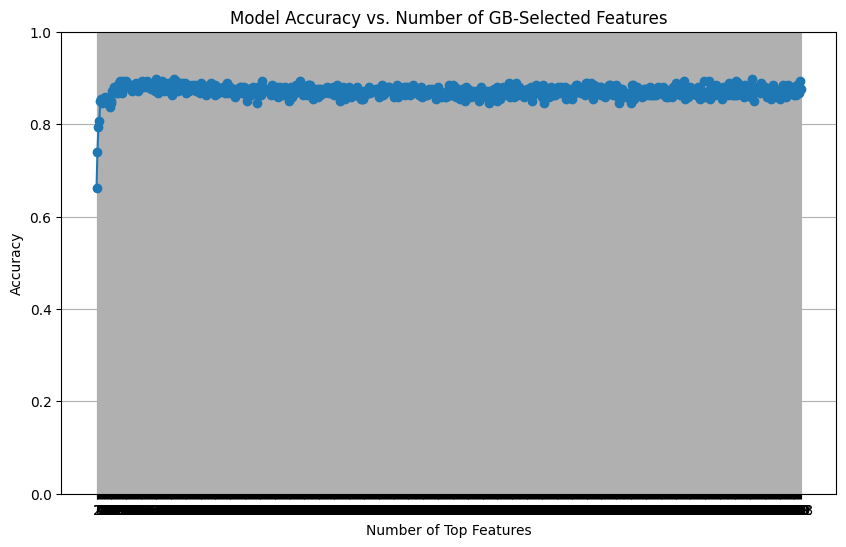

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get feature importances
gb_importances = gb_model.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1]

# Evaluate accuracy for different numbers of top GB-selected features
accuracies = []
max_features = 753  # Set a maximum number of features to check

for n in range(1, max_features + 1):
    # Select top n features based on GB feature importances
    top_gb_features = X_train.columns[gb_indices[:n]]

    # Train a Random Forest model with top features
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled[:, gb_indices[:n]], y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_scaled[:, gb_indices[:n]])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f"Accuracy with top {n} GB features: {accuracy:.4f}")

# Optional: Plot accuracies
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.title('Model Accuracy vs. Number of GB-Selected Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(feature_counts)
plt.ylim(0, 1)
plt.grid()
plt.show()


##(5) Selecting by PCA

Accuracy with top 1 PCA features: 0.6079
Accuracy with top 2 PCA features: 0.6872
Accuracy with top 3 PCA features: 0.7048
Accuracy with top 4 PCA features: 0.7093
Accuracy with top 5 PCA features: 0.7137
Accuracy with top 6 PCA features: 0.7137
Accuracy with top 7 PCA features: 0.7577
Accuracy with top 8 PCA features: 0.7445
Accuracy with top 9 PCA features: 0.7533
Accuracy with top 10 PCA features: 0.7489
Accuracy with top 11 PCA features: 0.7885
Accuracy with top 12 PCA features: 0.7841
Accuracy with top 13 PCA features: 0.7709
Accuracy with top 14 PCA features: 0.7753
Accuracy with top 15 PCA features: 0.7797
Accuracy with top 16 PCA features: 0.7797
Accuracy with top 17 PCA features: 0.7665
Accuracy with top 18 PCA features: 0.7841
Accuracy with top 19 PCA features: 0.7974
Accuracy with top 20 PCA features: 0.8150
Accuracy with top 21 PCA features: 0.8282
Accuracy with top 22 PCA features: 0.8370
Accuracy with top 23 PCA features: 0.8238
Accuracy with top 24 PCA features: 0.8062
A

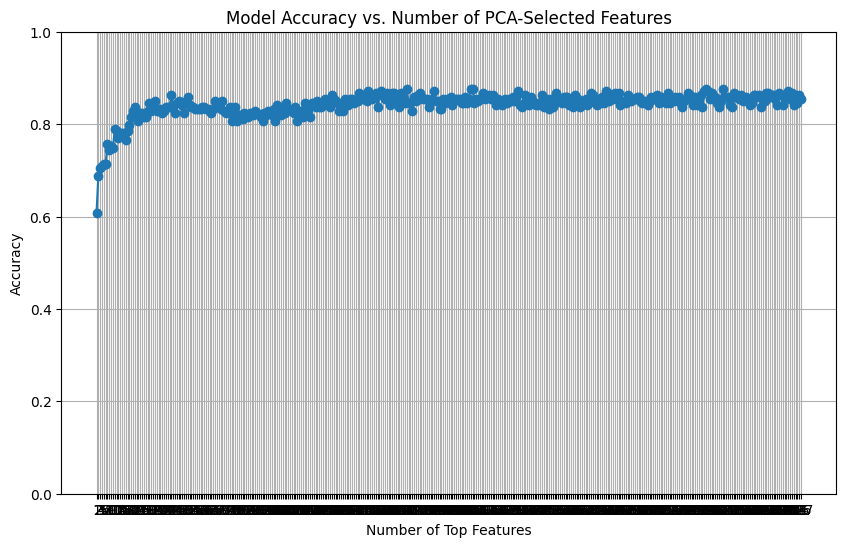

In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=117)  # Set number of components to 117
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(117)])

# Find the top contributing features for each principal component
distinct_features = set()  # Use a set to keep track of distinct features

# For each principal component, find the top features based on absolute loadings
for i in range(117):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10).index.tolist()  # Get top 10 features for each component
    distinct_features.update(top_features)  # Add features to the set

# Convert the set of distinct features to a list
pca_distinct_features = list(distinct_features)

# Select features and target variable
X = data[pca_distinct_features]  # Use PCA selected features
y = data['class']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a list to store accuracies
accuracies = []

# Evaluate accuracy for different numbers of top PCA-selected features
max_features = len(pca_distinct_features)

for n in range(1, max_features + 1):
    # Select top n features
    top_features = pca_distinct_features[:n]

    # Train a Random Forest model with top features
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled[:, :n], y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test_scaled[:, :n])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f"Accuracy with top {n} PCA features: {accuracy:.4f}")

# Optional: Plot accuracies
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.title('Model Accuracy vs. Number of PCA-Selected Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(feature_counts)
plt.ylim(0, 1)
plt.grid()
plt.show()


##(6) Ranking by Recursive Feature Elimination (RFE)

Selected features using RFE: Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=753)
Accuracy with top 1 RFE features: 0.7357
Accuracy with top 2 RFE features: 0.6211
Accuracy with top 3 RFE features: 0.7489
Accuracy with top 4 RFE features: 0.7621
Accuracy with top 5 RFE features: 0.7885
Accuracy with top 6 RFE features: 0.7401
Accuracy with top 7 RFE features: 0.7709
Accuracy with top 8 RFE features: 0.7885
Accuracy with top 9 RFE features: 0.8194
Accuracy with top 10 RFE features: 0.8194
Accuracy with top 11 RFE feat

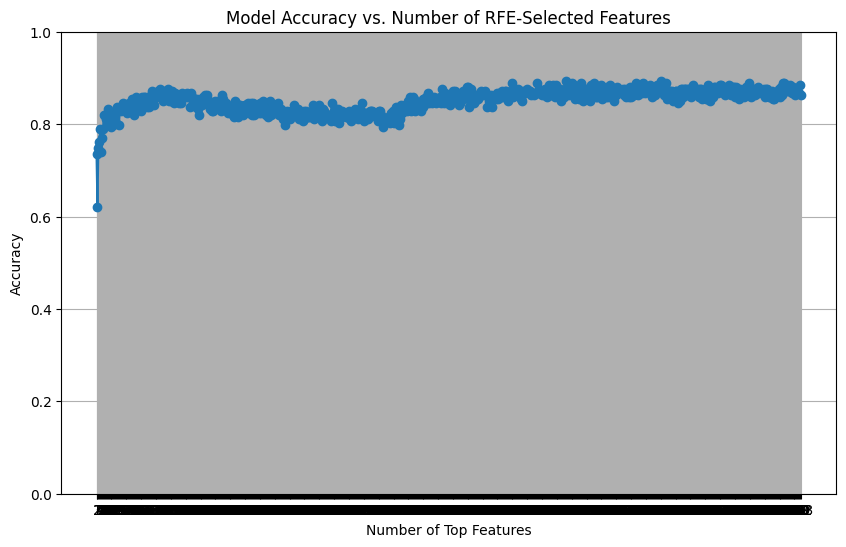

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select features and target variable
X = data.drop(['class', 'id'], axis=1)
y = data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use Random Forest as the base model for RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=753)
rfe.fit(X_train_scaled, y_train)

# Get selected features
rfe_selected_features = X_train.columns[rfe.support_]
print("Selected features using RFE:", rfe_selected_features)

# Initialize a list to store accuracies
accuracies = []

# Evaluate accuracy for different numbers of top RFE-selected features
max_features = len(rfe_selected_features)  # Total number of selected features

for n in range(1, max_features + 1):
    # Select top n features
    top_rfe_features = rfe_selected_features[:n]

    # Train a Random Forest model with top features
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled[:, rfe.support_][:, :n], y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test_scaled[:, rfe.support_][:, :n])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f"Accuracy with top {n} RFE features: {accuracy:.4f}")

# Optional: Plot accuracies
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.title('Model Accuracy vs. Number of RFE-Selected Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(feature_counts)
plt.ylim(0, 1)
plt.grid()
plt.show()
